# A. Introduction

### A.1.Description & Discussion of the Background

The primary issue that is affecting the world nowadays is COVID-19. No country has been left untouched. 
It is a deadly infectious disease that the world has never witnessed before. It is responsible for the 
loss of many lives and left the affected countries in both deep physical and economic depression. 

This all started in December 2019 in Wuhan, China. Since then it has spread globally at an alarming rate.
As a result, the World Health Organization declared the COVID‑19 outbreak as a pandemic on March 11, 2020.
As of May 19, 2020, more than 4.8 million cases have been reported across 188 countries and territories,
resulting in more than 315k deaths. It is an infectious disease caused by severe acute respiratory 
syndrome coronavirus 2 (SARS-CoV-2). People who are affected by this virus experience 
fever, cough, fatigue, shortness of breath, and loss of smell and taste. 
There is no vaccine yet, which means the only method of prevention is through self-quarantine.

Considering the distressful situation that the world is in, I believe that selecting COVID-19 as my topic makes the most sense. So it's my mere effort to 
analyze the cumulative data of confirmed cases, deaths, and recovered cases over time. My main focus is 
to analyze the spread trend of this virus all over the world with the right visualizations and also to 
cluster the countries affected accordingly.

We need to build the courage and act in harmony and peace to fight against this situation, 
hoping to see the world smile again overcoming the fear of death.

### A.2. Data Description

In consideration of the COVID 19 problem I have found Open data  available through reliable
sources:

I  have found  Time-series  COVID-19 Data Repository by the Center for Systems Science and 
Engineering (CSSE) at Johns Hopkins University, the repository has several datasets, among 
those I will be using dataset featuring the confirmed cases, no of deaths, and active cases
by countries, I will be downloading, preprocessing the data, and creating a World map 
featuring the COVID-19 stats by countries.

I will also be analyzing the USA country separately, I  have found a Time series dataset 
which also comes from a public dataset by NYT, located in the GitHub, this dataset provides
information on COVID-19 cases per US counties. I will be creating maps to display the stats
by counties.

I will be using the Foursquare API's to analyze single county to see the most affected 
venues by this pandemic.

I will be creating visualization maps featuring the effects of COVID19.

# B.Methodology

### B.1.Import necessary Libraries

In [89]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
import matplotlib.colors as colors


# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [90]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

print('Geopy installed and imported!')

Solving environment: done

# All requested packages already installed.

Geopy installed and imported!


In [91]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [92]:
pip install tabula-py

Note: you may need to restart the kernel to use updated packages.


In [93]:
from tabula import read_pdf

In [94]:
#declare the path of your file
file_path = "https://www.dallascounty.org/Assets/uploads/docs/covid-19/hhs-summary/PCCI-C19-CityDistribution-20200616.pdf"
#file_path = "PCCI-C19-CityDistribution-20200612.pdf"
#Convert your file
df_PDF = read_pdf(file_path,pages=1)
df_PDF

Got stderr: Jun 18, 2020 3:38:37 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 18, 2020 3:38:41 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 18, 2020 3:38:47 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



[               City  Patient Count Percent
 0           Addison             49   0.33%
 1     Balch Springs            125   0.84%
 2        Carrollton            254   1.71%
 3        Cedar Hill            208    1.4%
 4     Cockrell Hill             29    0.2%
 5           Combine              2   0.01%
 6           Coppell             56   0.38%
 7            Dallas           8262  55.66%
 8            DeSoto            259   1.74%
 9       Duncanville            247   1.66%
 10   Farmers Branch            182   1.23%
 11          Garland           1302   8.77%
 12    Glenn Heights             36   0.24%
 13    Grand Prairie            633   4.26%
 14    Highland Park             20   0.13%
 15         Hutchins             67   0.45%
 16           Irving           1517  10.22%
 17        Lancaster            234   1.58%
 18         Mesquite            786    5.3%
 19       Richardson            245   1.65%
 20          Rowlett            126   0.85%
 21           Sachse            

In [95]:
print(file_path[-12:-4])

20200616


In [96]:
from datetime import date
today = date.today()
d2 = today.strftime("%Y%m%d")
print("d2 =", d2)

d2 = 20200618


In [97]:
df_PDF[0]

,City,Patient Count,Percent
0,Addison,49,0.33%
1,Balch Springs,125,0.84%
2,Carrollton,254,1.71%
3,Cedar Hill,208,1.4%
4,Cockrell Hill,29,0.2%
5,Combine,2,0.01%
6,Coppell,56,0.38%
7,Dallas,8262,55.66%
8,DeSoto,259,1.74%
9,Duncanville,247,1.66%


In [98]:
dft=df_PDF[0]
dft

,City,Patient Count,Percent
0,Addison,49,0.33%
1,Balch Springs,125,0.84%
2,Carrollton,254,1.71%
3,Cedar Hill,208,1.4%
4,Cockrell Hill,29,0.2%
5,Combine,2,0.01%
6,Coppell,56,0.38%
7,Dallas,8262,55.66%
8,DeSoto,259,1.74%
9,Duncanville,247,1.66%


In [99]:
dft.shape

(28, 3)

In [100]:
dft.head(5)

,City,Patient Count,Percent
0,Addison,49,0.33%
1,Balch Springs,125,0.84%
2,Carrollton,254,1.71%
3,Cedar Hill,208,1.4%
4,Cockrell Hill,29,0.2%


In [101]:
all(isinstance(column, str) for column in dft.columns)

True

In [102]:
dft_mod1=dft[~dft['City'].isin(['Total','Not Reported'])]
dft_mod1

,City,Patient Count,Percent
0,Addison,49,0.33%
1,Balch Springs,125,0.84%
2,Carrollton,254,1.71%
3,Cedar Hill,208,1.4%
4,Cockrell Hill,29,0.2%
5,Combine,2,0.01%
6,Coppell,56,0.38%
7,Dallas,8262,55.66%
8,DeSoto,259,1.74%
9,Duncanville,247,1.66%


In [103]:
df_Dallas_popu = pd.read_csv('Dallas_Population.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [104]:
df_Dallas_popu

,City,Population
0,Addison,16404
1,Balch Springs,27001
2,Carrollton,135432
3,Cedar Hill,50552
4,Cockrell Hill,4660
5,Combine,2025
6,Coppell,43623
7,Dallas,1378903
8,DeSoto,56224
9,Duncanville,40953


##### Let's download the data and read into Pandas dataframe.

In [105]:
df_Covid_Countries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [106]:
df_Covid_Countries.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-18 02:33:24,-25.0000,133.0000,7390.0,102.0,6870.0,418.0,29.026265,NaN,NaN,1.380244,36,AUS
1,Austria,2020-06-18 02:33:24,47.5162,14.5501,17203.0,687.0,16099.0,417.0,191.008616,NaN,NaN,3.993490,40,AUT
2,Canada,2020-06-18 02:33:24,60.0010,-95.0010,101491.0,8312.0,63280.0,29899.0,268.099638,NaN,NaN,8.189889,124,CAN
3,China,2020-06-18 02:33:24,30.5928,114.3055,84458.0,4638.0,79510.0,310.0,6.012631,NaN,NaN,5.491487,156,CHN
4,Denmark,2020-06-18 02:33:24,56.2639,9.5018,12494.0,598.0,11385.0,511.0,215.703766,NaN,NaN,4.786297,208,DNK


In [107]:
df_Covid_Countries.shape

(188, 14)

In [108]:
Column_Names=['Country_Region','Confirmed','Deaths','Recovered','Active']
df_Covid_Countries_new=df_Covid_Countries[Column_Names]
df_Covid_Countries_new

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Australia,7390.0,102.0,6870.0,418.0
1,Austria,17203.0,687.0,16099.0,417.0
2,Canada,101491.0,8312.0,63280.0,29899.0
3,China,84458.0,4638.0,79510.0,310.0
4,Denmark,12494.0,598.0,11385.0,511.0
...,...,...,...,...,...
183,West Bank and Gaza,555.0,3.0,415.0,137.0
184,Western Sahara,9.0,1.0,8.0,0.0
185,Yemen,902.0,244.0,271.0,387.0
186,Zambia,1412.0,11.0,1142.0,259.0


In [109]:
df_Covid_Countries_new.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
df_Covid_Countries_new

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country_Region,Confirmed,Deaths,Recovered,Active
17,US,2163290.0,117717.0,592191.0,1382229.0
21,Brazil,955377.0,46510.0,521046.0,387821.0
13,Russia,552549.0,7468.0,303800.0,241281.0
26,India,354065.0,11903.0,186935.0,155227.0
16,United Kingdom,300717.0,42238.0,1304.0,257175.0
...,...,...,...,...,...
156,Seychelles,11.0,0.0,11.0,0.0
184,Western Sahara,9.0,1.0,8.0,0.0
116,MS Zaandam,9.0,2.0,NaN,7.0
140,Papua New Guinea,8.0,0.0,8.0,0.0


In [110]:
# get the top 10 entries
df_top10 = df_Covid_Countries_new.head(10)

df_top10

,Country_Region,Confirmed,Deaths,Recovered,Active
17,US,2163290.0,117717.0,592191.0,1382229.0
21,Brazil,955377.0,46510.0,521046.0,387821.0
13,Russia,552549.0,7468.0,303800.0,241281.0
26,India,354065.0,11903.0,186935.0,155227.0
16,United Kingdom,300717.0,42238.0,1304.0,257175.0
18,Spain,244683.0,27136.0,150376.0,67171.0
22,Peru,240908.0,7257.0,128622.0,105029.0
10,Italy,237828.0,34448.0,179455.0,23925.0
20,Chile,220628.0,3615.0,181931.0,35082.0
96,Iran,195051.0,9185.0,154812.0,31054.0


In [39]:
df_top10.set_index('Country_Region',inplace=True)
df_top10

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,2039468.0,114357.0,540292.0,1323131.0
Brazil,802828.0,40919.0,436668.0,325241.0
Russia,510761.0,6705.0,268862.0,235194.0
India,297535.0,8498.0,147195.0,141842.0
United Kingdom,294401.0,41566.0,1279.0,251556.0
Spain,243209.0,27136.0,150376.0,65697.0
Italy,236305.0,34223.0,173085.0,28997.0
Peru,214788.0,6088.0,102429.0,106271.0
France,193219.0,29377.0,72692.0,91150.0


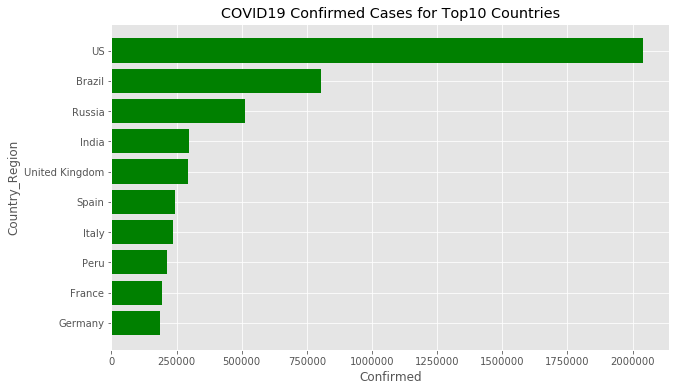

In [40]:
df_top10.plot(kind='barh',figsize=(10, 6))
plt.axes(axisbelow=True)
plt.barh(df_top10.sort_values('Confirmed')["Confirmed"].index[-10:],df_top10.sort_values('Confirmed')["Confirmed"].values[-10:],color="green")

plt.xlabel('Confirmed') # add to x-label to the plot
plt.ylabel('Country_Region') # add y-label to the plot
plt.title('COVID19 Confirmed Cases for Top10 Countries') # add title to the plot

plt.show()

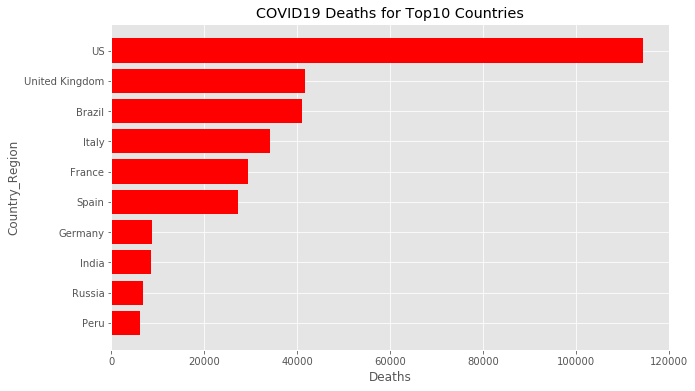

In [41]:
df_top10.plot(kind='barh',figsize=(10, 6))
plt.axes(axisbelow=True)
plt.barh(df_top10.sort_values('Deaths')["Deaths"].index[-10:],df_top10.sort_values('Deaths')["Deaths"].values[-10:],color="red")

plt.xlabel('Deaths') # add to x-label to the plot
plt.ylabel('Country_Region') # add y-label to the plot
plt.title('COVID19 Deaths for Top10 Countries') # add title to the plot

plt.show()

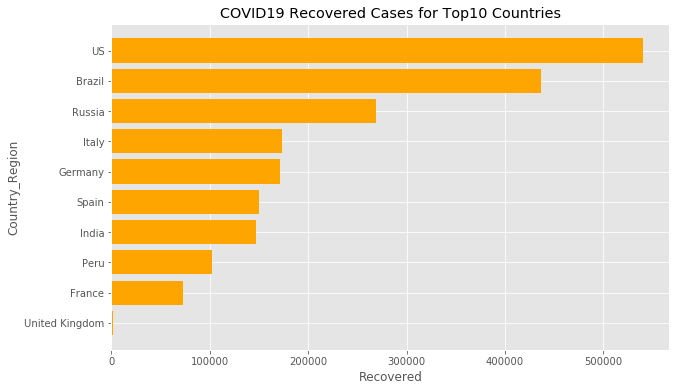

In [42]:
df_top10.plot(kind='barh',figsize=(10, 6))
plt.axes(axisbelow=True)
plt.barh(df_top10.sort_values('Recovered')["Recovered"].index[-10:],df_top10.sort_values('Recovered')["Recovered"].values[-10:],color="orange")

plt.xlabel('Recovered') # add to x-label to the plot
plt.ylabel('Country_Region') # add y-label to the plot
plt.title('COVID19 Recovered Cases for Top10 Countries') # add title to the plot

plt.show()

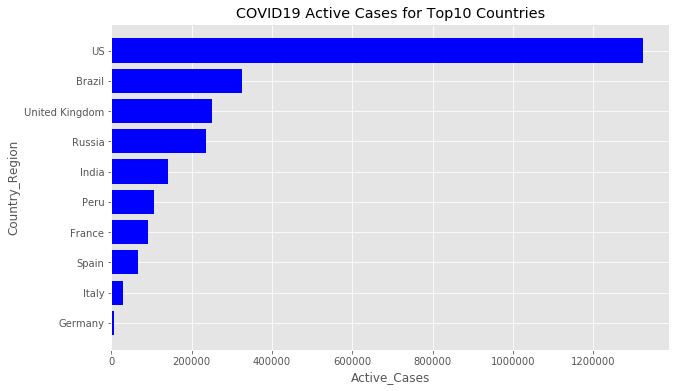

In [43]:
df_top10.plot(kind='barh',figsize=(10, 6))
plt.axes(axisbelow=True)
plt.barh(df_top10.sort_values('Active')["Active"].index[-10:],df_top10.sort_values('Active')["Active"].values[-10:],color="blue")
plt.xlabel('Active_Cases') # add to x-label to the plot
plt.ylabel('Country_Region') # add y-label to the plot
plt.title('COVID19 Active Cases for Top10 Countries') # add title to the plot

plt.show()

In [44]:
df_World_Covid19 = df_Covid_Countries.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_World_Covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Australia,2020-06-12 20:33:18,-25.0000,133.0000,7290.0,102.0,6783.0,405.0,28.633487
1,Austria,2020-06-12 20:33:18,47.5162,14.5501,17064.0,675.0,15985.0,404.0,189.465269
2,Canada,2020-06-12 20:33:18,60.0010,-95.0010,99421.0,8115.0,58788.0,32519.0,262.631505
3,China,2020-06-12 20:33:18,30.5928,114.3055,84220.0,4638.0,79469.0,113.0,5.995687
4,Denmark,2020-06-12 20:33:18,56.2639,9.5018,12299.0,594.0,11193.0,512.0,212.337171


In [45]:
df_Covid_Countries=df_Covid_Countries.dropna(subset=['Long_'])

In [46]:
df_Covid_Countries=df_Covid_Countries.dropna(subset=['Lat'])

In [47]:
# create map of Toronto using latitude and longitude values
latitude=21.00
longitude=78.00
map_World = folium.Map(location=[latitude, longitude],tiles='OpenstreetMap', zoom_start=3)

# add markers to map
for lat, lng, confirmed,deaths,countryRegion in zip(df_Covid_Countries['Lat'], df_Covid_Countries['Long_'], df_Covid_Countries['Confirmed'], df_Covid_Countries['Deaths'],df_Covid_Countries['Country_Region']):
    label = ('Country: {}  , Confirmed: {}  , Deaths: {}'.format(countryRegion,confirmed,deaths))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        Reset=True,
        parse_html=False).add_to(map_World)  
map_World

### Downloading US country's data
This data comes from a public dataset by NYT, located in GitHub.
The dataset provides information on COVID-19 cases per US counties.

In [17]:
df_US_Counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [18]:
df_US_Counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


FIPS 6-4) is a five-digit Federal Information Processing Standards code which uniquely identifies counties and county equivalents in the United States

In [19]:
df_US_Counties.shape

(242827, 6)

In [20]:
import numpy as np
df_US_Counties = df_US_Counties.replace('Not assigned',np.nan, regex=True)
df_US_Counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [21]:
df_US_Counties.shape

(242827, 6)

In [22]:
df_US_Counties.dropna(subset=['county'],  axis=0,inplace=True)
df_US_Counties = df_US_Counties.reset_index(drop=True)
df_US_Counties.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


In [23]:
df_US_Counties.sort_values(['date'], ascending=False, axis=0, inplace=True)
df_US_Counties.head(10)

,date,county,state,fips,cases,deaths
242826,2020-06-16,Weston,Wyoming,56045.0,1,0
240801,2020-06-16,Grant,Kentucky,21081.0,53,4
240810,2020-06-16,Hart,Kentucky,21099.0,36,0
240809,2020-06-16,Harrison,Kentucky,21097.0,56,0
240808,2020-06-16,Harlan,Kentucky,21095.0,13,0
240807,2020-06-16,Hardin,Kentucky,21093.0,133,5
240806,2020-06-16,Hancock,Kentucky,21091.0,12,0
240805,2020-06-16,Greenup,Kentucky,21089.0,16,0
240804,2020-06-16,Green,Kentucky,21087.0,3,0
240803,2020-06-16,Grayson,Kentucky,21085.0,137,11


In [24]:
df_Total=(df_US_Counties.groupby(
   ['county','state'],as_index=False
).agg(
    {
         'cases':max,    # Sum duration per group
         'deaths':max  # get the count of networks
    }
)).groupby(
['state'],as_index=False
).agg(
    {
         'cases':sum,    # Sum duration per group
         'deaths':sum  # get the count of networks
    })
df_Total

,state,cases,deaths
0,Alabama,27038,786
1,Alaska,756,10
2,Arizona,39298,1240
3,Arkansas,13194,196
4,California,159111,5207
5,Colorado,29714,1623
6,Connecticut,45546,4219
7,Delaware,10445,425
8,District of Columbia,9818,520
9,Florida,80108,3029


In [25]:
df_Total.shape

(55, 3)

In [34]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 6.3MB/s ta 0:00:011
     |████████████████████████████████| 92kB 4.6MB/s  eta 0:00:01
     |████████████████████████████████| 829kB 18.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [35]:
address1 = "US"
address2="Alabama"
address=address1+","+address2
g=geocoder.arcgis(address)
print("address",address)
print('The geograpical coordinate of Alabama are {}, {}.'.format(g.latlng[0], g.latlng[1]))

address US,Alabama
The geograpical coordinate of Alabama are 32.766542541000035, -86.84028685899995.


In [36]:
df_Total.columns

NameError: name 'df_Total' is not defined

In [29]:
AA=[]
BB=[]
CC=[]
Lat_list=[]
Lng_list=[]

for i in range(0,len(df_Total['cases'])):
    address1="US"
    address2=df_Total.loc[i]['state']
    address=address1+","+address2
    g=geocoder.arcgis(address)
    #geolocator = Nominatim(user_agent="US_explorer")
    #location = geolocator.geocode(address1,address2)
    AA.append(df_Total.iloc[i]['state'])
    BB.append(df_Total.iloc[i]['cases'])
    CC.append(df_Total.iloc[i]['deaths'])
    Lat_list.append(g.latlng[0])
    Lng_list.append(g.latlng[1])

In [30]:
import pandas as pd
df_Total_USA=pd.DataFrame(AA,columns=['state'])
df_Total_USA['cases']=BB
df_Total_USA['Deaths']=CC
df_Total_USA['Latitude']=Lat_list
df_Total_USA['Longitude']=Lng_list
df_Total_USA

,state,cases,Deaths,Latitude,Longitude
0,Alabama,27038,786,32.766543,-86.840287
1,Alaska,756,10,64.808088,-151.004158
2,Arizona,39298,1240,34.293016,-111.664754
3,Arkansas,13194,196,34.899924,-92.438885
4,California,159111,5207,36.374106,-119.270230
5,Colorado,29714,1623,38.998551,-105.547816
6,Connecticut,45546,4219,41.573503,-72.738306
7,Delaware,10445,425,39.008127,-75.467472
8,District of Columbia,9818,520,38.904771,-77.016322
9,Florida,80108,3029,28.566045,-81.688649


In [31]:
# create map and display it
S_latitude=31.462733
S_longitude=-99.333050
USA_Covid_Count_map = folium.Map(location=[S_latitude, S_longitude], zoom_start=4)
for i in range(0,len(df_Total_USA['cases'])):
    folium.CircleMarker(
        location=[df_Total_USA.iloc[i]['Latitude'], df_Total_USA.iloc[i]['Longitude']], 
        radius=5,
        popup = ('State: ' + str(df_Total_USA.iloc[i]['state']) + '<br>'
                 'Confirmed: ' + str(df_Total_USA.iloc[i]['cases'])+ '<br>'
                 'Deaths: ' + str(df_Total_USA.iloc[i]['Deaths'])
                ) ,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        reset=True
    ).add_to(USA_Covid_Count_map)
    
#for i in range(0,len(df_Total_USA)):
 #   my_string = 'State :{} , Cases :{}, Deaths :{}'.format(df_Total_USA.iloc[i].state, df_Total_USA.iloc[i].cases,df_Total_USA.iloc[i].Deaths)
 #   folium.CircleMarker([df_Total_USA.iloc[i]['Latitude'], df_Total_USA.iloc[i]['Longitude']], popup=my_string).add_to(USA_Covid_Count_map)

# show map
USA_Covid_Count_map

In [32]:
Column_Names=['state','cases','Deaths']
df_Covid_US_new=df_Total_USA[Column_Names]
df_Covid_US_new.sort_values(['Deaths'], ascending=False, axis=0, inplace=True)
df_US_top10=df_Covid_US_new.head(10)
df_US_top10.set_index('state',inplace=True)
df_US_top10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cases,Deaths
state,,
New York,391440,31860
New Jersey,171686,12749
Massachusetts,106561,7671
Illinois,134885,6612
Pennsylvania,84085,6355
Michigan,67006,6064
California,159111,5207
Connecticut,45546,4219
Maryland,63069,3072


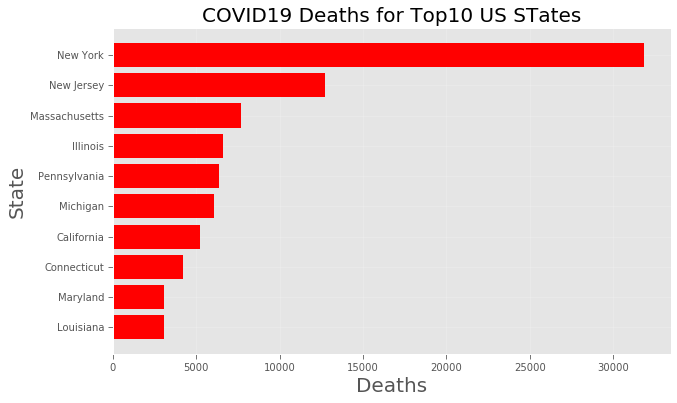

In [33]:
df_US_top10.plot(kind='barh',figsize=(10, 6))
plt.axes(axisbelow=True)
plt.barh(df_US_top10.sort_values('Deaths')["Deaths"].index[-10:],df_US_top10.sort_values('Deaths')["Deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 10)
plt.xlabel('Deaths',fontsize=20) # add to x-label to the plot
plt.ylabel('State',fontsize=20) # add y-label to the plot
plt.title('COVID19 Deaths for Top10 US STates',fontsize=20) # add title to the plot
plt.grid(alpha=0.2)

plt.show()

In [37]:
address1 = "Dallas"
address2="Texas"
address=address1+","+address2
gg=geocoder.arcgis(address)
DallasCounty_latitude=gg.latlng[0]
DallasCounty_longitude=gg.latlng[1]
print("address",address)
print('The geograpical coordinate of Dallas, Texas are {}, {}.'.format(DallasCounty_latitude, DallasCounty_longitude))
#print('The geograpical coordinate of Collin county, Texas are {}, {}.'.format(gg.latlng[0], gg.latlng[1]))

address Dallas,Texas
The geograpical coordinate of Dallas, Texas are 32.77822000000003, -96.79511999999994.


In [38]:
dft_mod1.columns

Index(['City', 'Patient Count', 'Percent'], dtype='object')

In [39]:
df_Dallas_popu.columns

Index(['City', 'Population'], dtype='object')

In [40]:
df_Dallas_new = pd.merge(df_Dallas_popu,dft_mod1, how="inner", on=["City"])
df_Dallas_new

,City,Population,Patient Count,Percent
0,Addison,16404,49,0.33%
1,Balch Springs,27001,125,0.84%
2,Carrollton,135432,254,1.71%
3,Cedar Hill,50552,208,1.4%
4,Cockrell Hill,4660,29,0.2%
5,Combine,2025,2,0.01%
6,Coppell,43623,56,0.38%
7,Dallas,1378903,8262,55.66%
8,DeSoto,56224,259,1.74%
9,Duncanville,40953,247,1.66%


In [41]:
AAA=[]
BBB=[]
CCC=[]
DDD=[]
Lat_list=[]
Lng_list=[]

for i in range(0,len(df_Dallas_new['City'])):
    address1=df_Dallas_new.loc[i]['City']
    address2="Texas"
    address=address1+","+address2
    g=geocoder.arcgis(address)
    #geolocator = Nominatim(user_agent="US_explorer")
    #location = geolocator.geocode(address1,address2)
    AAA.append(df_Dallas_new.iloc[i]['City'])
    BBB.append(address2)
    CCC.append(df_Dallas_new.iloc[i]['Population'])
    DDD.append(df_Dallas_new.iloc[i]['Patient Count'])
    Lat_list.append(g.latlng[0])
    Lng_list.append(g.latlng[1])

In [42]:
dft_DallasCounty=pd.DataFrame(AAA,columns=['City'])
dft_DallasCounty['State']=BBB
dft_DallasCounty['Population']=CCC
dft_DallasCounty['Patient Count']=DDD
dft_DallasCounty['Perc']=((dft_DallasCounty['Patient Count'])/(dft_DallasCounty['Population']))*100
dft_DallasCounty['Latitude']=Lat_list
dft_DallasCounty['Longitude']=Lng_list
dft_DallasCounty

,City,State,Population,Patient Count,Perc,Latitude,Longitude
0,Addison,Texas,16404,49,0.298708,32.95398,-96.81800
1,Balch Springs,Texas,27001,125,0.462946,32.72709,-96.62263
2,Carrollton,Texas,135432,254,0.187548,32.97555,-96.89023
3,Cedar Hill,Texas,50552,208,0.411458,32.58866,-96.95596
4,Cockrell Hill,Texas,4660,29,0.622318,32.73895,-96.89399
5,Combine,Texas,2025,2,0.098765,32.58564,-96.51223
6,Coppell,Texas,43623,56,0.128373,32.97654,-96.99133
7,Dallas,Texas,1378903,8262,0.599172,32.77822,-96.79512
8,DeSoto,Texas,56224,259,0.460657,32.60562,-96.85704
9,Duncanville,Texas,40953,247,0.603130,32.64622,-96.90502


In [43]:
# create map of Dallas County using latitude and longitude values
latitude= 32.77
longitude=-96.79

map_Dallas_County = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, City,Population in zip(dft_DallasCounty['Latitude'], dft_DallasCounty['Longitude'], dft_DallasCounty['City'], dft_DallasCounty['Population']):
    label = '{}, {}'.format(City,Population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Dallas_County)  

map_Dallas_County

### Lets define Foursquares

In [44]:
CLIENT_ID = 'JX2HTPHXOE2A1RWATZAC5NSNNE4DEKSL41MNPANODDXYMF2W' # your Foursquare ID
CLIENT_SECRET = 'YF2UGIID2ZJ1CMBA5QA1RZORTTPVS4Y234QLAMBRSHXS04MI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
HOSPITAL_KEY = "4bf58dd8d48988d196941735"

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('HOSPITAL_KEY:' + HOSPITAL_KEY)

Your credentails:
CLIENT_ID: JX2HTPHXOE2A1RWATZAC5NSNNE4DEKSL41MNPANODDXYMF2W
CLIENT_SECRET:YF2UGIID2ZJ1CMBA5QA1RZORTTPVS4Y234QLAMBRSHXS04MI
HOSPITAL_KEY:4bf58dd8d48988d196941735


In [45]:
LIMIT = 200
radius = 10000
url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&LIMIT={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION,DallasCounty_latitude, DallasCounty_longitude, radius, LIMIT,HOSPITAL_KEY)
url1


'https://api.foursquare.com/v2/venues/explore?client_id=JX2HTPHXOE2A1RWATZAC5NSNNE4DEKSL41MNPANODDXYMF2W&client_secret=YF2UGIID2ZJ1CMBA5QA1RZORTTPVS4Y234QLAMBRSHXS04MI&v=20180605&ll=32.77822000000003,-96.79511999999994&radius=10000&LIMIT=200&categoryId=4bf58dd8d48988d196941735'

In [46]:
results = requests.get(url1).json()

In [47]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Baylor University Medical Center,Hospital,32.789929,-96.780466
1,Parkland Health & Hospital System,Hospital,32.813022,-96.835212
2,UT Southwestern Medical Center,Medical Center,32.811456,-96.839271
3,Best Hair Transplant Dallas - Revive Hair Rest...,Hospital,32.778949,-96.796551
4,James W. Aston Ambulatory Care Center,Medical Center,32.812535,-96.838938
5,Baylor Medical Center at Uptown,Medical Center,32.804262,-96.794921
6,Baylor Jack and Jane Hamilton Heart and Vascul...,Hospital,32.787869,-96.781121
7,Baylor Scott & White Heart and Vascular Hospit...,Hospital,32.788164,-96.780947
8,Robert's Hospital at Baylor Medical Center,Hospital,32.788973,-96.780472
9,Roberts Hospital,Hospital,32.789012,-96.780458


In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the Cities in Dallas county

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            HOSPITAL_KEY)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
Dallas_County_venues = getNearbyVenues(names=dft_DallasCounty['City'],
                                    latitudes=dft_DallasCounty['Latitude'],
                                    longitudes=dft_DallasCounty['Longitude']
                                      )

Addison
Balch Springs
Carrollton
Cedar Hill
Cockrell Hill
Combine
Coppell
Dallas
DeSoto
Duncanville
Farmers Branch
Garland
Glenn Heights
Grand Prairie
Highland Park
Hutchins
Irving
Lancaster
Mesquite
Richardson
Rowlett
Sachse
Seagoville
Sunnyvale
University Park
Wilmer
Wylie


In [56]:
print(Dallas_County_venues.shape)
Dallas_County_venues.head()

(940, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,32.95398,-96.818,The Heart Hospital Baylor Plano,33.014818,-96.789573,Hospital
1,Addison,32.95398,-96.818,Methodist Hopital For Surgery,32.984661,-96.829450,Hospital
2,Addison,32.95398,-96.818,Revivify Cranial Prosthesis Billing,32.949006,-96.824967,Hospital
3,Addison,32.95398,-96.818,Emergis ER & Urgent Care,32.956300,-96.820540,Hospital
4,Addison,32.95398,-96.818,Texas Health Presbyterian Hospital Dallas,32.881813,-96.763005,Hospital


In [57]:
print('There are {} uniques categories.'.format(len(Dallas_County_venues['Venue Category'].unique())))

There are 9 uniques categories.


In [58]:
Dallas_County_venues_mod=Dallas_County_venues.groupby('City').count()
Dallas_County_venues_mod

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Addison,100,100,100,100,100,100
Balch Springs,13,13,13,13,13,13
Carrollton,76,76,76,76,76,76
Cedar Hill,11,11,11,11,11,11
Cockrell Hill,59,59,59,59,59,59
Coppell,29,29,29,29,29,29
Dallas,100,100,100,100,100,100
DeSoto,17,17,17,17,17,17
Duncanville,18,18,18,18,18,18


In [59]:
Dallas_County_venues['Venue Category'].unique()

array(['Hospital', 'Medical Center', 'Alternative Healer',
       "Doctor's Office", 'Pharmacy', 'Veterinarian', 'Hospital Ward',
       'Emergency Room', "Dentist's Office"], dtype=object)

In [60]:
Dallas_County_venues=Dallas_County_venues[~Dallas_County_venues['Venue Category'].isin(['Alternative Healer','Pharmacy','Veterinarian',"Dentist's Office"])]
Dallas_County_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,32.95398,-96.818,The Heart Hospital Baylor Plano,33.014818,-96.789573,Hospital
1,Addison,32.95398,-96.818,Methodist Hopital For Surgery,32.984661,-96.829450,Hospital
2,Addison,32.95398,-96.818,Revivify Cranial Prosthesis Billing,32.949006,-96.824967,Hospital
3,Addison,32.95398,-96.818,Emergis ER & Urgent Care,32.956300,-96.820540,Hospital
4,Addison,32.95398,-96.818,Texas Health Presbyterian Hospital Dallas,32.881813,-96.763005,Hospital


In [61]:
Dallas_County_venues['Venue Category'].unique()

array(['Hospital', 'Medical Center', "Doctor's Office", 'Hospital Ward',
       'Emergency Room'], dtype=object)

In [62]:
df_Dallas_new_Mod = pd.merge(dft_DallasCounty,Dallas_County_venues_mod, how="inner", on=["City"])
df_Dallas_new_Mod

,City,State,Population,Patient Count,Perc,Latitude,Longitude,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,Texas,16404,49,0.298708,32.95398,-96.81800,100,100,100,100,100,100
1,Balch Springs,Texas,27001,125,0.462946,32.72709,-96.62263,13,13,13,13,13,13
2,Carrollton,Texas,135432,254,0.187548,32.97555,-96.89023,76,76,76,76,76,76
3,Cedar Hill,Texas,50552,208,0.411458,32.58866,-96.95596,11,11,11,11,11,11
4,Cockrell Hill,Texas,4660,29,0.622318,32.73895,-96.89399,59,59,59,59,59,59
5,Coppell,Texas,43623,56,0.128373,32.97654,-96.99133,29,29,29,29,29,29
6,Dallas,Texas,1378903,8262,0.599172,32.77822,-96.79512,100,100,100,100,100,100
7,DeSoto,Texas,56224,259,0.460657,32.60562,-96.85704,17,17,17,17,17,17
8,Duncanville,Texas,40953,247,0.603130,32.64622,-96.90502,18,18,18,18,18,18
9,Farmers Branch,Texas,34816,182,0.522748,32.92178,-96.89271,34,34,34,34,34,34


In [63]:
df_Dallas_new_Mod=df_Dallas_new_Mod.drop(['City Latitude','City Longitude','Venue','Venue Latitude','Venue Longitude'],axis=1)
df_Dallas_new_Mod

,City,State,Population,Patient Count,Perc,Latitude,Longitude,Venue Category
0,Addison,Texas,16404,49,0.298708,32.95398,-96.81800,100
1,Balch Springs,Texas,27001,125,0.462946,32.72709,-96.62263,13
2,Carrollton,Texas,135432,254,0.187548,32.97555,-96.89023,76
3,Cedar Hill,Texas,50552,208,0.411458,32.58866,-96.95596,11
4,Cockrell Hill,Texas,4660,29,0.622318,32.73895,-96.89399,59
5,Coppell,Texas,43623,56,0.128373,32.97654,-96.99133,29
6,Dallas,Texas,1378903,8262,0.599172,32.77822,-96.79512,100
7,DeSoto,Texas,56224,259,0.460657,32.60562,-96.85704,17
8,Duncanville,Texas,40953,247,0.603130,32.64622,-96.90502,18
9,Farmers Branch,Texas,34816,182,0.522748,32.92178,-96.89271,34


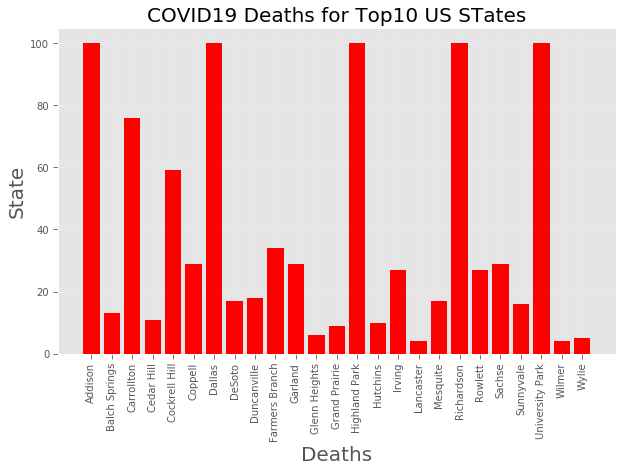

In [64]:
df_Dallas_new_Mod.plot(kind='bar',figsize=(10, 6))
index = np.arange(len(df_Dallas_new_Mod["City"]))
plt.axes(axisbelow=True)
plt.bar(index,df_Dallas_new_Mod["Venue Category"],color="red")
plt.tick_params(size=5,labelsize = 10)
plt.xlabel('Deaths',fontsize=20) # add to x-label to the plot
plt.ylabel('State',fontsize=20) # add y-label to the plot
plt.xticks(index,df_Dallas_new_Mod["City"], fontsize=10, rotation=90)
plt.title('COVID19 Deaths for Top10 US STates',fontsize=20) # add title to the plot
plt.grid(alpha=0.2)

plt.show()

# Cluster Neighborhoods

In [73]:
df_clusters = df_Dallas_new_Mod.drop(['City', 'State', 'Latitude', 'Longitude', 'Venue Category'],axis = 1)

In [79]:
import sklearn
from sklearn.cluster import KMeans
df_clusters = sklearn.preprocessing.StandardScaler().fit_transform(df_clusters)
df_clusters

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.3894507 , -0.33566921, -0.43908038],
       [-0.34973586, -0.28853511,  0.22613757],
       [ 0.05663576, -0.20853118, -0.88931298],
       [-0.26147275, -0.23705971,  0.01759321],
       [-0.43346421, -0.34807292,  0.87164499],
       [-0.28744086, -0.33132791, -1.12899234],
       [ 4.7168466 ,  4.75791447,  0.77789761],
       [-0.24021554, -0.20543025,  0.21686862],
       [-0.29744734, -0.21287248,  0.79393069],
       [-0.32044724, -0.25318454,  0.46835647],
       [ 0.47987222,  0.44142325,  0.47436923],
       [-0.39940096, -0.34373162, -0.58841749],
       [ 0.30502498,  0.02651913, -0.37787678],
       [-0.41471799, -0.35365459, -0.8105403 ],
       [-0.42633975, -0.32450587,  2.48719063],
       [ 0.47706891,  0.57476313,  0.83246634],
       [-0.29770219, -0.22093489,  0.66920753],
       [ 0.10914165,  0.12140752,  0.48135152],
       [-0.00884857, -0.21411285, -0.80769372],
       [-0.21324678, -0.28791493, -0.84424299],
       [-0.35213067, -0.34807292, -1.203

In [81]:
# We get the optimum number of k is 3
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:24]

array([2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [83]:
# Combining cluster data with dataframe
df_Dallas_new_Mod.insert(0, 'Cluster Labels', kmeans.labels_)
df_Dallas_new_Mod.head()

,Cluster Labels,City,State,Population,Patient Count,Perc,Latitude,Longitude,Venue Category
0,2,Addison,Texas,16404,49,0.298708,32.95398,-96.81800,100
1,0,Balch Springs,Texas,27001,125,0.462946,32.72709,-96.62263,13
2,2,Carrollton,Texas,135432,254,0.187548,32.97555,-96.89023,76
3,0,Cedar Hill,Texas,50552,208,0.411458,32.58866,-96.95596,11
4,0,Cockrell Hill,Texas,4660,29,0.622318,32.73895,-96.89399,59


In [85]:
# One outlier here is manhattun
# Now let us check the df per cluster
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 0)]

,Cluster Labels,City,State,Population,Patient Count,Perc,Latitude,Longitude,Venue Category
1,0,Balch Springs,Texas,27001,125,0.462946,32.72709,-96.62263,13
3,0,Cedar Hill,Texas,50552,208,0.411458,32.58866,-96.95596,11
4,0,Cockrell Hill,Texas,4660,29,0.622318,32.73895,-96.89399,59
7,0,DeSoto,Texas,56224,259,0.460657,32.60562,-96.85704,17
8,0,Duncanville,Texas,40953,247,0.603130,32.64622,-96.90502,18
9,0,Farmers Branch,Texas,34816,182,0.522748,32.92178,-96.89271,34
10,0,Garland,Texas,248363,1302,0.524233,32.91427,-96.63655,29
14,0,Hutchins,Texas,6561,67,1.021186,32.64974,-96.71331,10
15,0,Irving,Texas,247615,1517,0.612645,32.81352,-96.95534,27
16,0,Lancaster,Texas,40885,234,0.572337,32.59316,-96.75511,4


In [86]:
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 1)]

,Cluster Labels,City,State,Population,Patient Count,Perc,Latitude,Longitude,Venue Category
6,1,Dallas,Texas,1378903,8262,0.599172,32.77822,-96.79512,100


In [87]:
df_Dallas_new_Mod[(df_Dallas_new_Mod['Cluster Labels'] == 2)]

,Cluster Labels,City,State,Population,Patient Count,Perc,Latitude,Longitude,Venue Category
0,2,Addison,Texas,16404,49,0.298708,32.95398,-96.81800,100
2,2,Carrollton,Texas,135432,254,0.187548,32.97555,-96.89023,76
5,2,Coppell,Texas,43623,56,0.128373,32.97654,-96.99133,29
11,2,Glenn Heights,Texas,13749,36,0.261837,32.55265,-96.85679,6
12,2,Grand Prairie,Texas,201709,633,0.313818,32.74770,-97.00720,9
13,2,Highland Park,Texas,9662,20,0.206996,32.82848,-96.79703,100
18,2,Richardson,Texas,117959,245,0.207699,32.96074,-96.73297,100
19,2,Rowlett,Texas,63420,126,0.198675,32.90101,-96.56960,27
20,2,Sachse,Texas,26362,29,0.110007,32.97426,-96.59842,29
21,2,Sunnyvale,Texas,6473,18,0.278078,32.78032,-96.54620,16


In [ ]:
# Let us see neighborhoods which does not have any hospitals
excluded_df = pd.merge(nyc_df, df_Dallas_new_Mod, how='outer', indicator=True, on=["City"])
excluded_df = excluded_df.loc[excluded_df._merge == 'left_only', ["Borough", "Neighborhood"]]
excluded_df.head(10)